In [3]:
datos=spark.read.csv("Ecommerce_Customers.csv",header=True,
                     inferSchema=True)

In [6]:
datos.printSchema(),datos.show(2,vertical=True)

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)

-RECORD 0------------------------------------
 Email                | mstephenson@ferna... 
 Address              | 835 Frank TunnelW... 
 Avatar               | Violet               
 Avg Session Length   | 34.49726772511229    
 Time on App          | 12.65565114916675    
 Time on Website      | 39.57766801952616    
 Length of Membership | 4.0826206329529615   
 Yearly Amount Spent  | 587.9510539684005    
-RECORD 1------------------------------------
 Email                | hduke@hotmail.com    
 Address              | 4547 Archer Commo... 
 Avatar               | DarkGreen            
 Avg Session Length   | 31.926272026360

(None, None)

In [8]:
print(datos.columns)

['Email', 'Address', 'Avatar', 'Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']


In [9]:
from pyspark.ml.feature import VectorAssembler

In [10]:
constructor=VectorAssembler(inputCols=['Avg Session Length', 
    'Time on App', 'Time on Website', 'Length of Membership'],
    outputCol="features")

In [11]:
datosF=constructor.transform(datos)

In [13]:
datosF.printSchema(),datosF.show(2,vertical=True,truncate=False)

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)
 |-- features: vector (nullable = true)

-RECORD 0------------------------------------------------------------------------------------------
 Email                | mstephenson@fernandez.com                                                  
 Address              | 835 Frank TunnelWrightmouth, MI 82180-9605                                 
 Avatar               | Violet                                                                     
 Avg Session Length   | 34.49726772511229                                                          
 Time on App          | 12.65565114916675                                                        

(None, None)

In [16]:
entrena,evalua=datosF.randomSplit([0.8,0.2])

In [17]:
entrena.describe().show(),evalua.describe().show()

+-------+-----------------+--------------------+-----------+------------------+------------------+------------------+--------------------+-------------------+
|summary|            Email|             Address|     Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+-------+-----------------+--------------------+-----------+------------------+------------------+------------------+--------------------+-------------------+
|  count|              398|                 398|        398|               398|               398|               398|                 398|                398|
|   mean|             null|                null|       null|33.045567755412065|12.084322488130503| 37.05380816043408|   3.511361021662158|  499.1858177997398|
| stddev|             null|                null|       null|1.0035769551365212|0.9756257071134922|0.9965582926667782|  0.9815730010647468|  77.38217731805587|
|    min|aaron04@yahoo.com|001 Estrada Union..

(None, None)

In [19]:
from pyspark.ml.regression import LinearRegression

In [20]:
lr=LinearRegression(labelCol="Yearly Amount Spent")

In [21]:
#se entrena el modelo
modelo=lr.fit(entrena)

In [22]:
#se evalua el modelo
resEval=modelo.evaluate(evalua)

In [67]:
#se comprueban las métricas para realizar la evaluación
resEval.r2 #0 mal, 1 bien

0.9839015779062529

In [31]:
resEval.residuals.describe().show()

+-------+-------------------+
|summary|          residuals|
+-------+-------------------+
|  count|                102|
|   mean|-0.9690396308235377|
| stddev| 10.976539848243274|
|    min|-30.671034376209548|
|    max| 23.693675958556014|
+-------+-------------------+



In [27]:
resEval.predictions.select("Yearly Amount Spent","prediction").show()

+-------------------+------------------+
|Yearly Amount Spent|        prediction|
+-------------------+------------------+
| 482.14499687576796| 476.7678146249352|
| 256.67058229005585|255.23624640426578|
|  497.8119300055205|474.11825404696447|
| 402.16712222372564|423.26674315742025|
|  449.0703194428044| 438.9757059033109|
|  532.9352188376637| 528.1796669991611|
|  611.0000251040717| 606.8755846906504|
|   570.451725912857| 556.4523668606748|
|  275.9184206503857| 280.9355629556658|
|  588.7126055095755|  577.804850375913|
|  528.9336185650203| 532.5057762505801|
|  528.2238093680072| 528.3407133438029|
| 407.65717875932603|395.72661625418345|
|  411.1869635742789| 425.0550007901379|
| 483.15972078451705|470.82258344211346|
|  551.0230017027826| 549.7798426485949|
|  547.7099885778624| 554.1830225033696|
|  478.1703340540876|479.40205677682343|
|  421.9667941858674| 417.2606581512066|
|  403.8195198321978|401.57823966077467|
+-------------------+------------------+
only showing top

In [29]:
resEval.predictions.select("Yearly Amount Spent","prediction").describe().show()

+-------+-------------------+------------------+
|summary|Yearly Amount Spent|        prediction|
+-------+-------------------+------------------+
|  count|                102|               102|
|   mean| 499.81434946077206|500.78338909159555|
| stddev|  86.85129170803928| 85.71241074334498|
|    min| 256.67058229005585|255.23624640426578|
|    max|  725.5848140556806| 725.2365143171626|
+-------+-------------------+------------------+



In [30]:
resEval.rootMeanSquaredError

10.96550249524559

In [32]:
# se genera el modelo para todos los datos
modeloOk=lr.fit(datosF)

In [36]:
datosNuevos=spark.read.csv("clientesNuevos.csv",header=True,
                          inferSchema=True)

In [38]:
datosNuevos.printSchema(),datosNuevos.show(vertical=True)

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)

-RECORD 0---------------------------------
 Email                | pepe@gmail.com    
 Address              | null              
 Avatar               | null              
 Avg Session Length   | 30.0              
 Time on App          | 15.0              
 Time on Website      | 45.0              
 Length of Membership | 3.9               
-RECORD 1---------------------------------
 Email                | marta@hotmail.com 
 Address              | null              
 Avatar               | null              
 Avg Session Length   | 27.5              
 Time on App          | 17.9              
 Time on Website      | 32.8              
 Length of Membership | 1.1               


(None, None)

In [39]:
datosNuevosF=constructor.transform(datosNuevos)

In [41]:
datosNuevosF.printSchema(),datosNuevosF.show(vertical=True)

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- features: vector (nullable = true)

-RECORD 0------------------------------------
 Email                | pepe@gmail.com       
 Address              | null                 
 Avatar               | null                 
 Avg Session Length   | 30.0                 
 Time on App          | 15.0                 
 Time on Website      | 45.0                 
 Length of Membership | 3.9                  
 features             | [30.0,15.0,45.0,3.9] 
-RECORD 1------------------------------------
 Email                | marta@hotmail.com    
 Address              | null                 
 Avatar               | null                 
 Avg Session Length   | 27.5                 
 Tim

(None, None)

In [42]:
pred=modeloOk.transform(datosNuevosF)
#se aplica el modelo a datos nuevos

In [44]:
pred.show(vertical=True)

-RECORD 0------------------------------------
 Email                | pepe@gmail.com       
 Address              | null                 
 Avatar               | null                 
 Avg Session Length   | 30.0                 
 Time on App          | 15.0                 
 Time on Website      | 45.0                 
 Length of Membership | 3.9                  
 features             | [30.0,15.0,45.0,3.9] 
 prediction           | 560.8759946488267    
-RECORD 1------------------------------------
 Email                | marta@hotmail.com    
 Address              | null                 
 Avatar               | null                 
 Avg Session Length   | 27.5                 
 Time on App          | 17.9                 
 Time on Website      | 32.8                 
 Length of Membership | 1.1                  
 features             | [27.5,17.9,32.8,1.1] 
 prediction           | 431.05214268076224   
-RECORD 2------------------------------------
 Email                | pedro@hotm

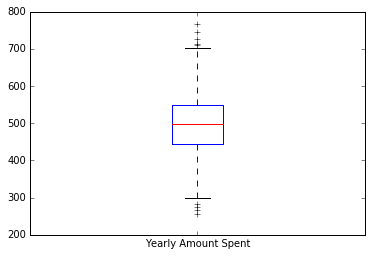

In [48]:
datosP=datos.select("Yearly Amount Spent").toPandas()
datosP.plot.box()

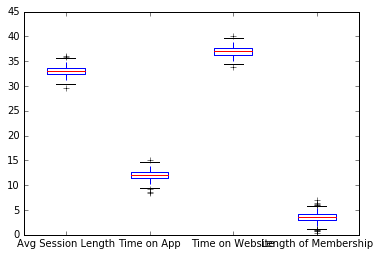

In [50]:
datosP=datos.drop("Yearly Amount Spent").toPandas()
datosP.plot.box()

In [51]:
modeloOk.coefficients

DenseVector([25.7343, 38.7092, 0.4367, 61.5773])

Coeficiente de correlación de Pearson
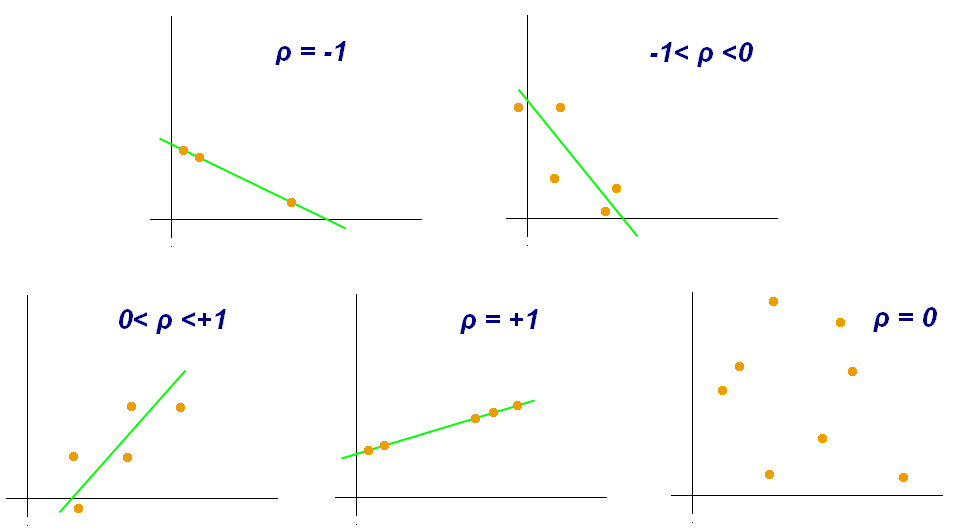

In [54]:
datos.columns

['Email',
 'Address',
 'Avatar',
 'Avg Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

In [55]:
datos.corr('Time on Website','Yearly Amount Spent')

-0.0026408446721578795

In [56]:
datos.corr('Avg Session Length','Yearly Amount Spent')

0.35508829470764297

In [57]:
datos.corr('Time on App','Yearly Amount Spent')

0.4993277700534503

In [58]:
datos.corr('Length of Membership','Yearly Amount Spent')

0.8090835682475807

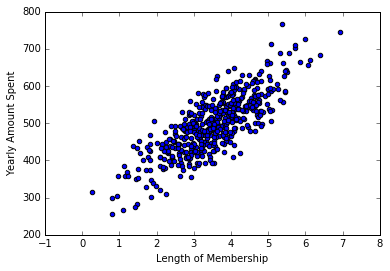

In [61]:
datosP=datos.select('Length of Membership','Yearly Amount Spent')\
.toPandas()
datosP.plot.scatter(x='Length of Membership',
                   y='Yearly Amount Spent')



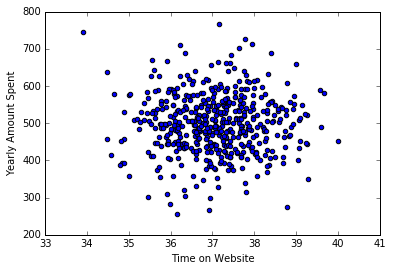

In [62]:
datosP=datos.select('Time on Website','Yearly Amount Spent')\
.toPandas()
datosP.plot.scatter(x='Time on Website',
                   y='Yearly Amount Spent')

In [63]:
from pandas.plotting import scatter_matrix

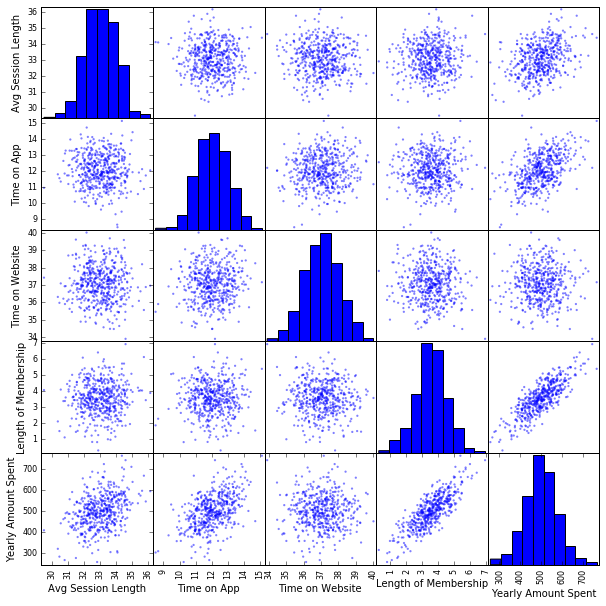

In [66]:
datosP=datos.toPandas()
a=scatter_matrix(datosP,figsize=(10,10))